In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [0]:
km = UNITS.kilometer
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
days = UNITS.day
degree = UNITS.degree

In [0]:
params = Params(distance = 149.6*10**9 *m,
                v_init = 0 * m/ s,
                G = 6.67 * 10**-11 * (m**3/(s**2 * kg)),
                mass_earth = 5.972 * 10**24* kg,
                mass_sun = 1.989 * 10**30 * kg)
                

In [4]:
params2 = Params(x_distance = 149.6*10**9 *m,
                 y_distance = 0 *m,
                v_init = 0 * m/ s,
                angle = 90 * degree,
                G = 6.67 * 10**-11 * (m**3/(s**2 * kg)),
                mass_earth = 5.972 * 10**24* kg,
                mass_sun = 1.989 * 10**30 * kg)
                

x_distance                            149600000000.0 meter
y_distance                                         0 meter
v_init                                  0.0 meter / second
angle                                            90 degree
G             6.67e-11 meter ** 3 / kilogram / second ** 2
mass_earth                              5.972e+24 kilogram
mass_sun                   1.9890000000000002e+30 kilogram
dtype: object

In [5]:
def make_system2(params2):
    """Makes a System object for the given conditions.
    
    params: Params object
    
    returns: System object
    """
    angle, v_init = params2.angle, params2.v_init
    x_distance = params2.x_distance
    y_distance = params2.y_distance
    
    theta = np.deg2rad(angle)
    vx, vy = pol2cart(theta, v_init)
    
    R = Vector(x_distance, y_distance)
    V = Vector(vx, vy)
    
    init = State(R=R, V=V)
    
    t_end =  3.154 *10**7 *s
    dt = t_end / 10**4
    
    return System(params2, init=init, t_end=t_end, dt=dt)

In [6]:
def make_system(params):
    """Makes a System object for the given conditions.
    
    params: Params object
    
    returns: System object
    """
    
    distance = params.distance
    v_init = params.v_init
    
    init = State(r=distance, v=v_init)
    t_end =  9.072* 10**6 *s
    dt = t_end / 10**4
    
    return System(params, init=init, t_end=t_end, dt=dt)

In [7]:
system = make_system2(params2)

x_distance                                 149600000000.0 meter
y_distance                                              0 meter
v_init                                       0.0 meter / second
angle                                                 90 degree
G                  6.67e-11 meter ** 3 / kilogram / second ** 2
mass_earth                                   5.972e+24 kilogram
mass_sun                        1.9890000000000002e+30 kilogram
init          R           [149600000000.0 meter, 0.0 meter]
...
t_end                                         31540000.0 second
dt                                                3154.0 second
dtype: object

In [8]:
def slope_func2(state, t, system):
    
    

    R,V = state
    mass_sun = system.mass_sun
    G = system.G
    r_mag = R.mag
    r_unit_vector = R.hat()
    
    drdt = V
    dvdt = ((-G* mass_sun)/(r_mag**2))*r_unit_vector
    
    return drdt, dvdt

In [9]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object
    
    returns: derivatives of y and v
    """
    r, v = state
    mass_sun = system.mass_sun
    G = system.G
    
    drdt = v
    dvdt = (-G* mass_sun)/(r**2)
    
    return drdt, dvdt

In [10]:
slope_func2(system.init, 0, system)

(array([0., 0.]) <Unit('meter / second')>,
 array([-0.00592785, -0.        ]) <Unit('meter / second ** 2')>)

In [11]:
def event_func(state, t, system):

    R, V = state
    surfaces_touching = R.mag - ((6.371 *10**6 * m) + 695.51 *10**6 * m)
    
    return surfaces_touching

In [12]:
results, details = run_ode_solver(system, slope_func2, events=event_func)
details

success                                                 True
message    The solver successfully reached the end of the...
dtype: object

In [13]:
results.head()

R  \
0          [149600000000.0 meter, 0.0 meter]   
3154   [149599970515.70062 meter, 0.0 meter]   
6308   [149599882062.79086 meter, 0.0 meter]   
9462     [149599734641.201 meter, 0.0 meter]   
12616   [149599528250.8148 meter, 0.0 meter]   

                                                       V  
0               [0.0 meter / second, 0.0 meter / second]  
3154   [-18.696448559795822 meter / second, 0.0 meter...  
6308   [-37.392911858950995 meter / second, 0.0 meter...  
9462   [-56.0894046368866 meter / second, 0.0 meter /...  
12616  [-74.78594163315154 meter / second, 0.0 meter ...

In [14]:
results.tail()

R  \
31527384  [9.466097861076322e+16 meter, 0.0 meter]   
31530538  [9.467249174376258e+16 meter, 0.0 meter]   
31533692  [9.468400487676194e+16 meter, 0.0 meter]   
31536846   [9.46955180097613e+16 meter, 0.0 meter]   
31540000  [9.470703114276066e+16 meter, 0.0 meter]   

                                                          V  
31527384  [3650327520.4039083 meter / second, 0.0 meter ...  
31530538  [3650327520.4039083 meter / second, 0.0 meter ...  
31533692  [3650327520.4039083 meter / second, 0.0 meter ...  
31536846  [3650327520.4039083 meter / second, 0.0 meter ...  
31540000  [3650327520.4039083 meter / second, 0.0 meter ...

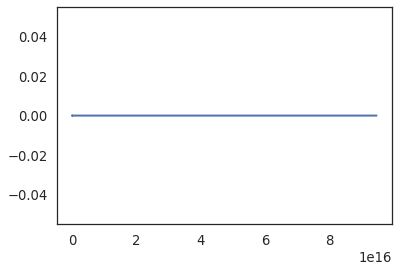

In [15]:
x = results.R.extract('x')
y = results.R.extract('y')

plot(x,y, label='trajectory')